# 実験B

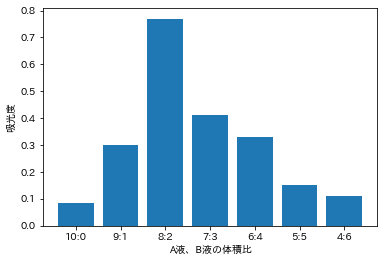

In [1]:
import numpy as np
import scipy as sp
import scipy.constants as const
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import sympy as sym
x=[1,2,3,4,5,6,7]
y=[0.085, 0.3, 0.77, 0.41, 0.33, 0.15, 0.11]
label = ['10:0', '9:1', '8:2', '7:3', '6:4', '5:5', '4:6']
plt.bar(x, y)
plt.ylabel('吸光度')
plt.xlabel('A液、B液の体積比')
plt.xticks(x, label)
plt.savefig('1.pdf')
plt.show()

In [2]:
from scipy import optimize
from sklearn.linear_model import LinearRegression as LR

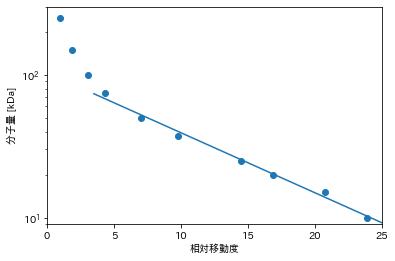

In [3]:
bunsi = [10,15,20, 25, 37, 50, 75, 100, 150, 250][::-1]
kyori = np.array([22, 41, 67, 95, 155, 215, 318, 372, 457, 526])
x = np.array([85, 289, 437]) / kyori[0]
kyori = kyori / kyori[0]
reg = LR().fit(kyori[3:10].reshape((-1, 1)), np.log(bunsi)[3:10])
plt.yscale('log')
plt.xlim(0, 25)
plt.ylim(9, 300)
plt.scatter(kyori, bunsi)
X = np.linspace(3.5, 30)
plt.plot(X, np.exp(reg.predict(X.reshape((-1, 1)))))
plt.xlabel('相対移動度')
plt.ylabel('分子量 [kDa]')
plt.savefig('kenryo.pdf')
plt.show()

In [4]:
np.exp(reg.predict(x.reshape((-1, 1))))

array([71.11821952, 29.00111299, 15.12823281])

In [5]:
a = {}
for i in range(len(bunsi) +  1):
    for j in range(i + 2, len(bunsi) + 1):
        a[(i, j)] = LR().fit(kyori[2:].reshape((-1, 1)), np.log(bunsi)[2:]).score(kyori[i:j].reshape((-1, 1)), np.log(bunsi)[i:j])

In [6]:
a[max(a, key=a.get)]

0.9861703447030934

In [7]:
max(a, key=a.get)

(3, 10)

In [8]:
a

{(0, 2): -6.511948431152308,
 (0, 3): -1.3948796944155566,
 (0, 4): -0.23260129325809187,
 (0, 5): 0.33798663982872185,
 (0, 6): 0.5817137178939801,
 (0, 7): 0.731913066101846,
 (0, 8): 0.8073015109453174,
 (0, 9): 0.8550947200493135,
 (0, 10): 0.8928892388618701,
 (1, 3): -1.8952481384425446,
 (1, 4): 0.0177726851430261,
 (1, 5): 0.6118111307585004,
 (1, 6): 0.7813661404896894,
 (1, 7): 0.8765860380926409,
 (1, 8): 0.9171181331468986,
 (1, 9): 0.9395165121680846,
 (1, 10): 0.9577125545000336,
 (2, 4): 0.27673166274474637,
 (2, 5): 0.8267219142055817,
 (2, 6): 0.8973470943326054,
 (2, 7): 0.949779654569567,
 (2, 8): 0.9685813532119547,
 (2, 9): 0.9759480200080157,
 (2, 10): 0.9841659604460699,
 (3, 5): 0.8499616944367776,
 (3, 6): 0.8827232538542915,
 (3, 7): 0.9518166920593597,
 (3, 8): 0.9719821665034415,
 (3, 9): 0.9774365157154317,
 (3, 10): 0.9861703447030934,
 (4, 6): 0.35472436602189855,
 (4, 7): 0.8715755432372102,
 (4, 8): 0.9373663615423117,
 (4, 9): 0.956083904576191,
 (4, 1

# 実験A

In [103]:
# 試験管番号、吸光度洗浄あり、洗浄なし
idx, a1, a2 = list(zip(*[
[16, 0.044, 0.045],
[15, 0.067, 0.061],
[14, 0.069, 0.072],
[13, 0.098, 0.099],
[12, 0.153, 0.172],
[11, 0.233, 0.288],
[10, 0.372, 0.445],
[9, 0.59, 0.716],
[8, 0.849, 0.918],
[7, 1.014, 0.877],
[6, 1.176, 0.595],
[5, 1.218, 0.411],
[4, 1.209, 0.299],
[3, 1.226, 0.22],
[2, 1.219, 0.157],
[1, 1.241, 0.118],
]))
# 濃度 ug / mL
c = 32 / (2 ** np.array(idx))
c[0] = 1e-10

In [104]:
c

array([1.000000e-10, 9.765625e-04, 1.953125e-03, 3.906250e-03,
       7.812500e-03, 1.562500e-02, 3.125000e-02, 6.250000e-02,
       1.250000e-01, 2.500000e-01, 5.000000e-01, 1.000000e+00,
       2.000000e+00, 4.000000e+00, 8.000000e+00, 1.600000e+01])

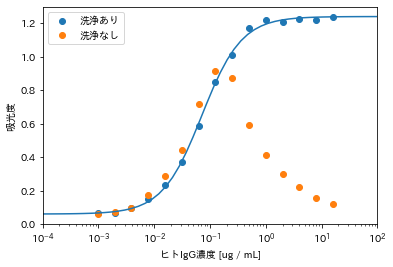

In [110]:
plt.scatter(c, a1, label='洗浄あり')
# plt.plot(X, np.poly1d(np.polyfit(np.log(c[1:-7]), a1[1:-7], 2))(np.log(X)))
X = np.logspace(-4, 2)
sig = lambda x, a, b, c, d: d / (1 + np.exp(-a * np.log(x) - b)) + c
param = sp.optimize.curve_fit(sig, c, a1)[0]
plt.plot(X, sig(X, *param))

plt.scatter(c, a2, label='洗浄なし')


plt.xlabel('ヒトIgG濃度 [ug / mL]')
plt.ylabel('吸光度')
plt.xscale('log')
plt.xlim((1e-4, 1e2))
plt.ylim((0, 1.3))
plt.legend()
plt.savefig('A-kenryo.pdf')
plt.show()

In [111]:
sig = lambda x, a, b, c, d: d / (1 + np.exp(-a * np.log(x) - b)) + c
param = sp.optimize.curve_fit(sig, c, a1)
param

(array([1.22130073, 3.2227649 , 0.06091429, 1.18055615]),
 array([[ 2.32512190e-03,  6.08497694e-03,  2.39194056e-04,
         -4.57408298e-04],
        [ 6.08497694e-03,  1.78633283e-02,  4.48922993e-04,
         -1.18010142e-03],
        [ 2.39194056e-04,  4.48922993e-04,  8.78645868e-05,
         -1.03461178e-04],
        [-4.57408298e-04, -1.18010142e-03, -1.03461178e-04,
          1.95828179e-04]]))